In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

In [2]:
from google.colab import files
uploaded = files.upload()

Saving world_population.csv to world_population.csv


In [3]:
df=pd.read_csv('world_population.csv')
df.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [5]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ', '_')
df.head(1)

,rank,cca3,country/territory,capital,continent,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(per_km²),growth_rate,world_population_percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52


In [ ]:
# rank рейтинг по населению
# cca3 3-значный код страны/территории
# country/territory название страны/территории
# capital столица
# continent континент
# 2022_population численность населения в 2022 году
# года 2022, 2020, 2015, 2010, 2000, 1990, 1980, 1970
# area_(km²) площадь
# density_(per_km²) плотность населения в 2022 году
# growth_rate темпы роста населения
# world_population_percentage процент населения

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank                         234 non-null    int64  
 1   cca3                         234 non-null    object 
 2   country/territory            234 non-null    object 
 3   capital                      234 non-null    object 
 4   continent                    234 non-null    object 
 5   2022_population              234 non-null    int64  
 6   2020_population              234 non-null    int64  
 7   2015_population              234 non-null    int64  
 8   2010_population              234 non-null    int64  
 9   2000_population              234 non-null    int64  
 10  1990_population              234 non-null    int64  
 11  1980_population              234 non-null    int64  
 12  1970_population              234 non-null    int64  
 13  area_(km²)          

In [ ]:
df.duplicated().sum() # пропусков и дубликатов нет

0

In [ ]:
df.nunique() # все страны уникальны

rank                           234
cca3                           234
country/territory              234
capital                        234
continent                        6
2022_population                234
2020_population                234
2015_population                234
2010_population                234
2000_population                234
1990_population                234
1980_population                234
1970_population                234
area_(km²)                     233
density_(per_km²)              234
growth_rate                    180
world_population_percentage     70
dtype: int64

In [ ]:
df.continent.value_counts()

continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: count, dtype: int64

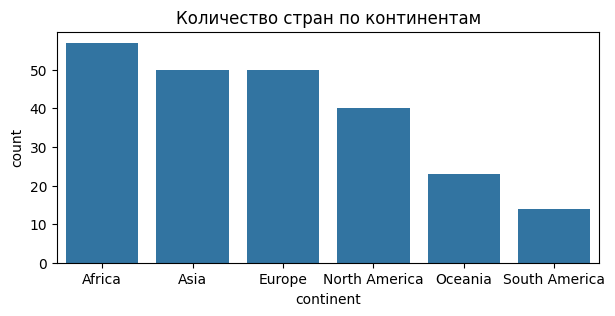

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df.continent, order=['Africa', 'Asia', 'Europe',\
                                'North America', 'Oceania', 'South America']);
plt.title('Количество стран по континентам');

In [ ]:
stats.chisquare(df.continent.value_counts().values, [39,39,39,39,39,39])

Power_divergenceResult(statistic=37.128205128205124, pvalue=5.645273601031033e-07)

In [ ]:
# распределение количества стран по континентам не равномерно

In [ ]:
df.world_population_percentage.sum()

99.93

In [ ]:
df.sort_values('world_population_percentage', ascending=False)\
 [['country/territory', '2022_population', 'world_population_percentage']]\
 .head(10)

,country/territory,2022_population,world_population_percentage
41,China,1425887337,17.88
92,India,1417173173,17.77
221,United States,338289857,4.24
93,Indonesia,275501339,3.45
156,Pakistan,235824862,2.96
149,Nigeria,218541212,2.74
27,Brazil,215313498,2.70
16,Bangladesh,171186372,2.15
171,Russia,144713314,1.81
131,Mexico,127504125,1.60


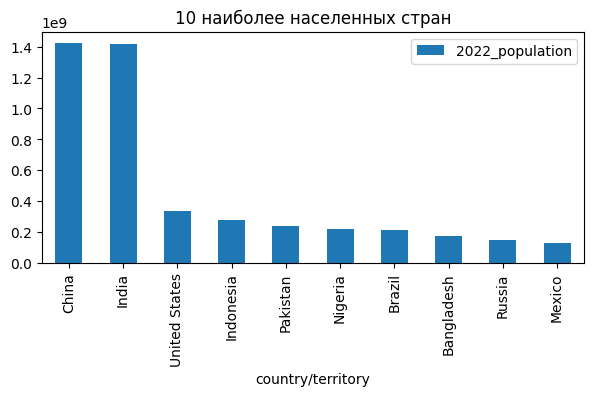

In [ ]:
df.sort_values('world_population_percentage', ascending=False)\
 [['country/territory', '2022_population', 'world_population_percentage']]\
 .head(10).plot(kind='bar', x='country/territory', y='2022_population'\
                , figsize=(7,3));
plt.title('10 наиболее населенных стран');

In [ ]:
df.sort_values('2022_population', ascending=False)\
 [['country/territory', '2022_population', 'world_population_percentage']]\
 .tail(10)

,country/territory,2022_population,world_population_percentage
142,Nauru,12668,0.0
229,Wallis and Futuna,11572,0.0
216,Tuvalu,11312,0.0
173,Saint Barthelemy,10967,0.0
177,Saint Pierre and Miquelon,5862,0.0
137,Montserrat,4390,0.0
64,Falkland Islands,3780,0.0
150,Niue,1934,0.0
209,Tokelau,1871,0.0
226,Vatican City,510,0.0


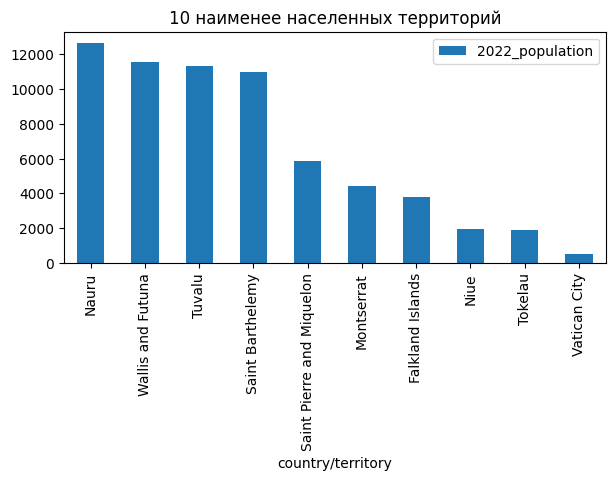

In [ ]:
df.sort_values('2022_population', ascending=False)\
 [['country/territory', '2022_population', 'world_population_percentage']]\
 .tail(10).plot(kind='bar', x='country/territory', y='2022_population'\
                , figsize=(7,3));
plt.title('10 наименее населенных территорий');

In [ ]:
df.sort_values('area_(km²)', ascending=False)\
 [['country/territory', 'area_(km²)', '2022_population']]\
 .head(10)

,country/territory,area_(km²),2022_population
171,Russia,17098242,144713314
35,Canada,9984670,38454327
41,China,9706961,1425887337
221,United States,9372610,338289857
27,Brazil,8515767,215313498
11,Australia,7692024,26177413
92,India,3287590,1417173173
8,Argentina,2780400,45510318
105,Kazakhstan,2724900,19397998
2,Algeria,2381741,44903225


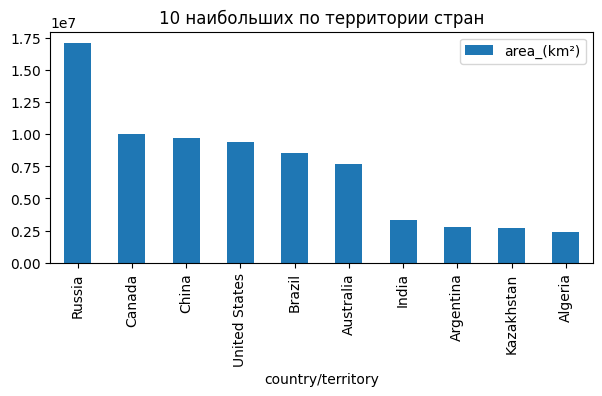

In [ ]:
df.sort_values('area_(km²)', ascending=False)\
 [['country/territory', 'area_(km²)', '2022_population']]\
 .head(10).plot(kind='bar', x='country/territory', y='area_(km²)'\
                , figsize=(7,3));
plt.title('10 наибольших по территории стран');

In [ ]:
df.sort_values('area_(km²)', ascending=False)\
 [['country/territory', 'area_(km²)', '2022_population']]\
 .tail(10)

,country/territory,area_(km²),2022_population
176,Saint Martin,53,31791
188,Sint Maarten,34,44175
119,Macau,30,695168
216,Tuvalu,26,11312
142,Nauru,21,12668
173,Saint Barthelemy,21,10967
209,Tokelau,12,1871
76,Gibraltar,6,32649
134,Monaco,2,36469
226,Vatican City,1,510


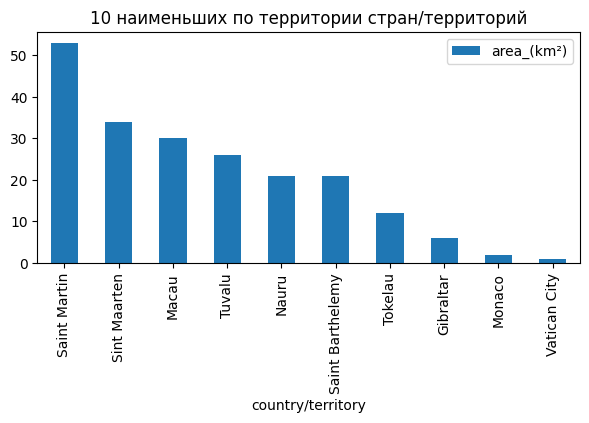

In [ ]:
df.sort_values('area_(km²)', ascending=False)\
 [['country/territory', 'area_(km²)', '2022_population']]\
 .tail(10).plot(kind='bar', x='country/territory', y='area_(km²)'\
                , figsize=(7,3));
plt.title('10 наименьших по территории стран/территорий');

In [ ]:
df.sort_values('growth_rate', ascending=False)\
 [['country/territory', 'growth_rate', '2022_population']]\
 .head(10)

,country/territory,growth_rate,2022_population
133,Moldova,1.0691,3272996
164,Poland,1.0404,39857145
148,Niger,1.0378,26207977
202,Syria,1.0376,22125249
189,Slovakia,1.0359,5643453
55,DR Congo,1.0325,99010212
130,Mayotte,1.0319,326101
39,Chad,1.0316,17723315
5,Angola,1.0315,35588987
124,Mali,1.0314,22593590


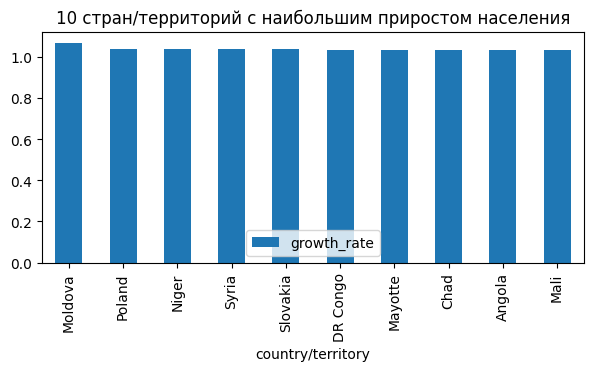

In [ ]:
df.sort_values('growth_rate', ascending=False)\
 [['country/territory', 'growth_rate', '2022_population']]\
 .head(10).plot(kind='bar', x='country/territory', y='growth_rate'\
                , figsize=(7,3));
plt.title('10 стран/территорий с наибольшим приростом населения');

In [ ]:
# 10 стран/территорий с наименьшим приростом населения
df.sort_values('growth_rate', ascending=False)\
 [['country/territory', 'growth_rate', '2022_population']]\
 .tail(10)

,country/territory,growth_rate,2022_population
46,Croatia,0.9927,4030358
184,Serbia,0.9897,7221365
126,Marshall Islands,0.9886,41569
25,Bosnia and Herzegovina,0.9886,3233526
111,Latvia,0.9876,1850651
117,Lithuania,0.9869,2750055
30,Bulgaria,0.9849,6781953
3,American Samoa,0.9831,44273
112,Lebanon,0.9816,5489739
218,Ukraine,0.9120,39701739


In [ ]:
dc=df.groupby('continent').agg({'2022_population':'sum'}).\
sort_values('2022_population', ascending=False).reset_index()
dc['2022_population']=dc['2022_population']/1000000000
dc

,continent,2022_population
0,Asia,4.721383
1,Africa,1.426731
2,Europe,0.743148
3,North America,0.600296
4,South America,0.436817
5,Oceania,0.045039


In [ ]:
df[df['country/territory']=='Russia']

,rank,cca3,country/territory,capital,continent,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(per_km²),growth_rate,world_population_percentage
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81


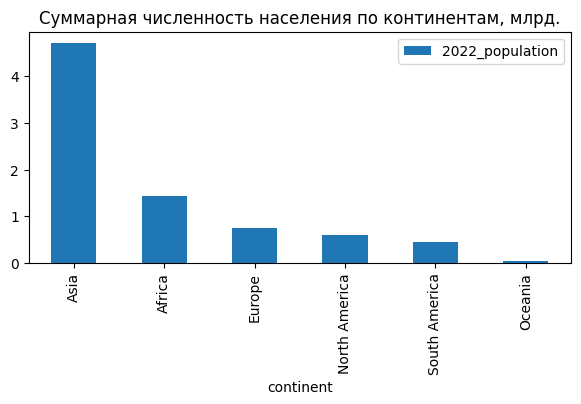

In [ ]:
dc.plot(kind='bar', x='continent', y='2022_population', figsize=(7,3));
plt.title('Суммарная численность населения по континентам, млрд.');

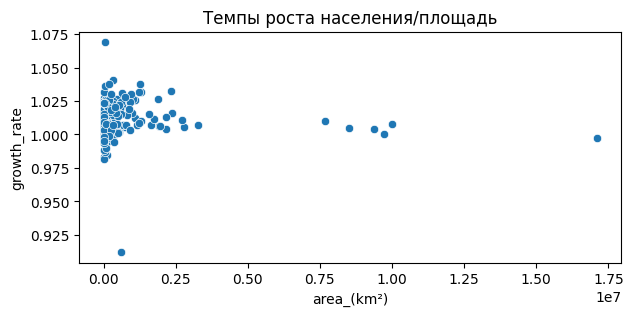

In [ ]:
plt.figure(figsize=(7,3))
sns.scatterplot(data=df, x='area_(km²)', y='growth_rate');
plt.title('Темпы роста населения/площадь');

In [ ]:
df['growth_rate'].corr(df['area_(km²)'])

-0.013970172284877102

In [ ]:
# корреляции не наблюдается

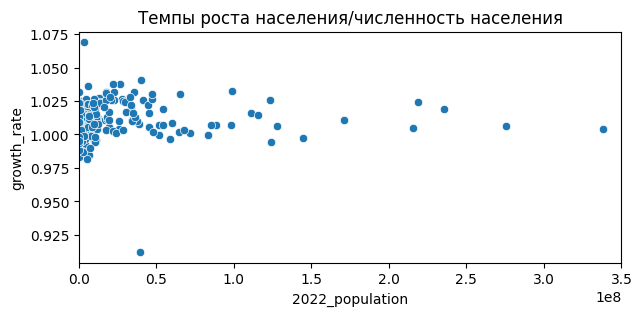

In [ ]:
plt.figure(figsize=(7,3))
sns.scatterplot(data=df, x='2022_population', y='growth_rate');
plt.title('Темпы роста населения/численность населения');
plt.xlim(0,350000000);

In [ ]:
df['growth_rate'].corr(df['2022_population'])

-0.020863452036929027

In [ ]:
# корреляции не наблюдается

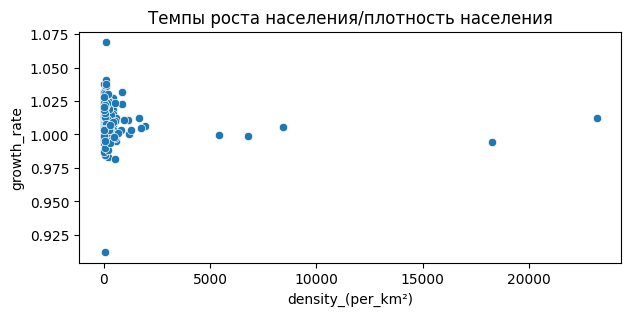

In [ ]:
plt.figure(figsize=(7,3))
sns.scatterplot(data=df, x='density_(per_km²)', y='growth_rate');
plt.title('Темпы роста населения/плотность населения');

In [ ]:
df['growth_rate'].corr(df['density_(per_km²)'])

-0.06975328389290476

In [ ]:
# корреляции не наблюдается

In [ ]:
df.head(1)

,rank,cca3,country/territory,capital,continent,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(per_km²),growth_rate,world_population_percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52


In [ ]:
dg=pd.DataFrame(columns=['20_10', '10_00', '00_90', '90_80', '80_70'])

In [ ]:
dg['20_10']=df['2020_population']/df['2010_population']
dg['10_00']=df['2010_population']/df['2000_population']
dg['00_90']=df['2000_population']/df['1990_population']
dg['90_80']=df['1990_population']/df['1980_population']
dg['80_70']=df['1980_population']/df['1970_population']

In [ ]:
dg.head() # прирост населения

,20_10,10_00,00_90,90_80,80_70
0,1.382500,1.442445,1.827336,0.856500,1.161226
1,0.984022,0.915581,0.965693,1.120142,1.265373
2,1.211826,1.165127,1.205993,1.361735,1.358328
3,0.842112,0.941937,1.217742,1.454053,1.214626
4,1.086425,1.082031,1.233867,1.504282,1.793102


In [ ]:
dg.nunique()

20_10    234
10_00    234
00_90    234
90_80    234
80_70    234
dtype: int64

In [ ]:
dg.describe()

,20_10,10_00,00_90,90_80,80_70
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,1.136763,1.162756,1.176002,1.241395,1.241529
std,0.147532,0.208520,0.168362,0.265596,0.242540
min,0.812734,0.673243,0.475521,0.696453,0.701446
25%,1.031155,1.040699,1.059079,1.075279,1.099966
50%,1.115917,1.135129,1.168568,1.210241,1.225143
75%,1.225518,1.268453,1.287244,1.323385,1.329209
max,1.610959,2.652742,1.827336,3.617155,3.401887


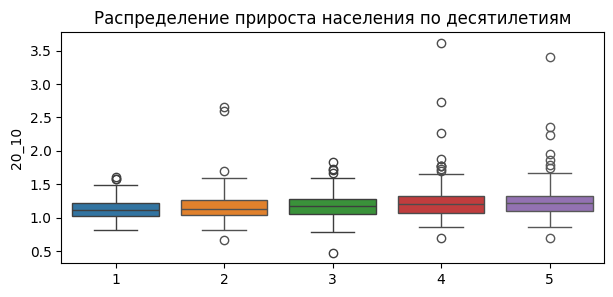

In [ ]:
plt.figure(figsize=(7,3))
sns.boxplot(y=dg['20_10'], x=1);
sns.boxplot(y=dg['10_00'], x=2);
sns.boxplot(y=dg['00_90'], x=3);
sns.boxplot(y=dg['90_80'], x=4);
sns.boxplot(y=dg['80_70'], x=5);
plt.title('Распределение прироста населения по десятилетиям');

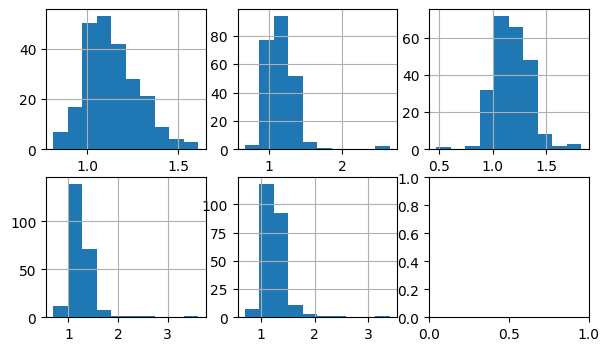

In [ ]:
fig, ax = plt.subplots(nrows= 2 , ncols= 3, figsize=(7,4))
dg['20_10'].hist(ax=ax[0,0]);
dg['10_00'].hist(ax=ax[0,1]);
dg['00_90'].hist(ax=ax[0,2]);
dg['90_80'].hist(ax=ax[1,0]);
dg['80_70'].hist(ax=ax[1,1]);

In [ ]:
# визуально распределения не нормальны

In [ ]:
stats.friedmanchisquare(dg['20_10'], dg['10_00'], dg['00_90'], dg['90_80'],\
                        dg['80_70'])

FriedmanchisquareResult(statistic=161.31623931623926, pvalue=7.631731577237345e-34)

In [ ]:
# по тесту Фридмана, по крайней мере два распределения различаются между собой
# по данным видна тенденция к уменьшению средних и медианных значений темпов
# прироста населения